# **Trilha 1: Tarefa**

Implemente um programa em Python (Python notebook) que constrói um dicionário de termos de um documento (mínimo 1000 palavras) com a frequência de cada termo permitindo confirmar a lei de Zipf para o documento selecionado.

Comente ao final os resultados obtidos.

# **Introdução**

O texto utilizado para esta Tarefa foi o livro de **Salmos** da **Bíblia Sagrada** em formato .TXT. A ideia veio a partir da minha grande admiração pela Bíblia Sagrada e como uma forma de homenageá-la resolvi escolher o seu maior livro, o Salmos.

### Bibliotécas Utilizadas

In [35]:
# Para o dataframe
import pandas as pd

# Para o gráfico
import matplotlib.pyplot as plt
import seaborn as sns

# Para stopwords
import nltk

# Para a imagem
from PIL import Image
import numpy as np

# Para a nuvem de palavras
from wordcloud import WordCloud

### Extraindo e Limpando os Dados

In [24]:
texto = []

txt = open('/content/Salmos.txt', 'r')
for linha in txt:
  texto.append(linha)

sinais = ['\n', '.', ',', '(', ')', '?', '!', '\'', '[', ']', ';', ':']

for i in range(len(texto)):
  for j in sinais:
    texto[i] = texto[i].lower() # Mantendo o texto em letra minúscula
    texto[i] = texto[i].replace(j,'') # Retirando todos os sinais
    texto[i] = ''.join([i for i in texto[i] if not i.isdigit()]) # Retirando os dígitos

In [25]:
nltk.download() # Realizando o download do pacote stopwords

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [26]:
texto2 = ''.join(texto).split() # Unindo as frases e separando por palavras

stopwordsnltk = nltk.corpus.stopwords.words('portuguese') # Extraindo as Stopwords do NLTK
texto3 = [palavra for palavra in texto2 if palavra not in stopwordsnltk] # Retirando as Stopwords

print(texto3)

['salmos', 'bem-aventurado', 'homem', 'anda', 'segundo', 'conselho', 'ímpios', 'detém', 'caminho', 'pecadores', 'assenta', 'roda', 'escarnecedores', 'antes', 'prazer', 'lei', 'senhor', 'lei', 'medita', 'dia', 'noite', 'pois', 'árvore', 'plantada', 'junto', 'correntes', 'águas', 'dá', 'fruto', 'estação', 'própria', 'cuja', 'folha', 'cai', 'tudo', 'quanto', 'fizer', 'prosperará', 'assim', 'ímpios', 'semelhantes', 'moinha', 'vento', 'espalha', 'ímpios', 'subsistirão', 'juízo', 'pecadores', 'congregação', 'justos', 'porque', 'senhor', 'conhece', 'caminho', 'justos', 'caminho', 'ímpios', 'conduz', 'ruína', 'salmos', 'amotinam', 'nações', 'povos', 'tramam', 'vão', 'reis', 'terra', 'levantam', 'príncipes', 'juntos', 'conspiram', 'contra', 'senhor', 'contra', 'ungido', 'dizendo', 'rompamos', 'ataduras', 'sacudamos', 'cordas', 'sentado', 'céus', 'rirá', 'senhor', 'zombará', 'então', 'falará', 'ira', 'furor', 'confundirá', 'dizendo', 'estabelecido', 'rei', 'sobre', 'sião', 'santo', 'monte', 'fal

### Construindo o Dicionário

In [27]:
contaPalavra = {}

# Contando as palavras
for i in texto3:
  contaPalavra[i] = texto3.count(i)

print(contaPalavra)

{'salmos': 151, 'bem-aventurado': 17, 'homem': 66, 'anda': 8, 'segundo': 39, 'conselho': 10, 'ímpios': 57, 'detém': 1, 'caminho': 53, 'pecadores': 6, 'assenta': 2, 'roda': 2, 'escarnecedores': 1, 'antes': 20, 'prazer': 11, 'lei': 35, 'senhor': 794, 'medita': 1, 'dia': 67, 'noite': 30, 'pois': 217, 'árvore': 2, 'plantada': 1, 'junto': 9, 'correntes': 5, 'águas': 39, 'dá': 28, 'fruto': 11, 'estação': 1, 'própria': 6, 'cuja': 16, 'folha': 1, 'cai': 2, 'tudo': 24, 'quanto': 24, 'fizer': 4, 'prosperará': 1, 'assim': 48, 'semelhantes': 2, 'moinha': 2, 'vento': 17, 'espalha': 1, 'subsistirão': 2, 'juízo': 14, 'congregação': 9, 'justos': 26, 'porque': 164, 'conhece': 12, 'conduz': 3, 'ruína': 3, 'amotinam': 1, 'nações': 59, 'povos': 47, 'tramam': 1, 'vão': 10, 'reis': 24, 'terra': 191, 'levantam': 15, 'príncipes': 15, 'juntos': 7, 'conspiram': 2, 'contra': 107, 'ungido': 10, 'dizendo': 20, 'rompamos': 1, 'ataduras': 1, 'sacudamos': 1, 'cordas': 11, 'sentado': 2, 'céus': 56, 'rirá': 1, 'zombará

### Visualização Gráfica

In [42]:
pd.set_option('display.max_rows', None) # Para visualizar todas as linhas do Dataframe
df = pd.DataFrame(list(contaPalavra.items()), columns=['Palavra', 'Quantidade']) # Criando um Dataframe
df = df.sort_values(by='Quantidade', ascending=False, ignore_index=True) # Ordenando de forma decrescente o Dataframe pela coluna Quantidade 
df = df[df['Quantidade']>26] # Filtrando a coluna Quantidade para valores maiores que 26
df.head()

,Palavra,Quantidade
0,senhor,794
1,deus,439
2,ó,251
3,pois,217
4,mim,193


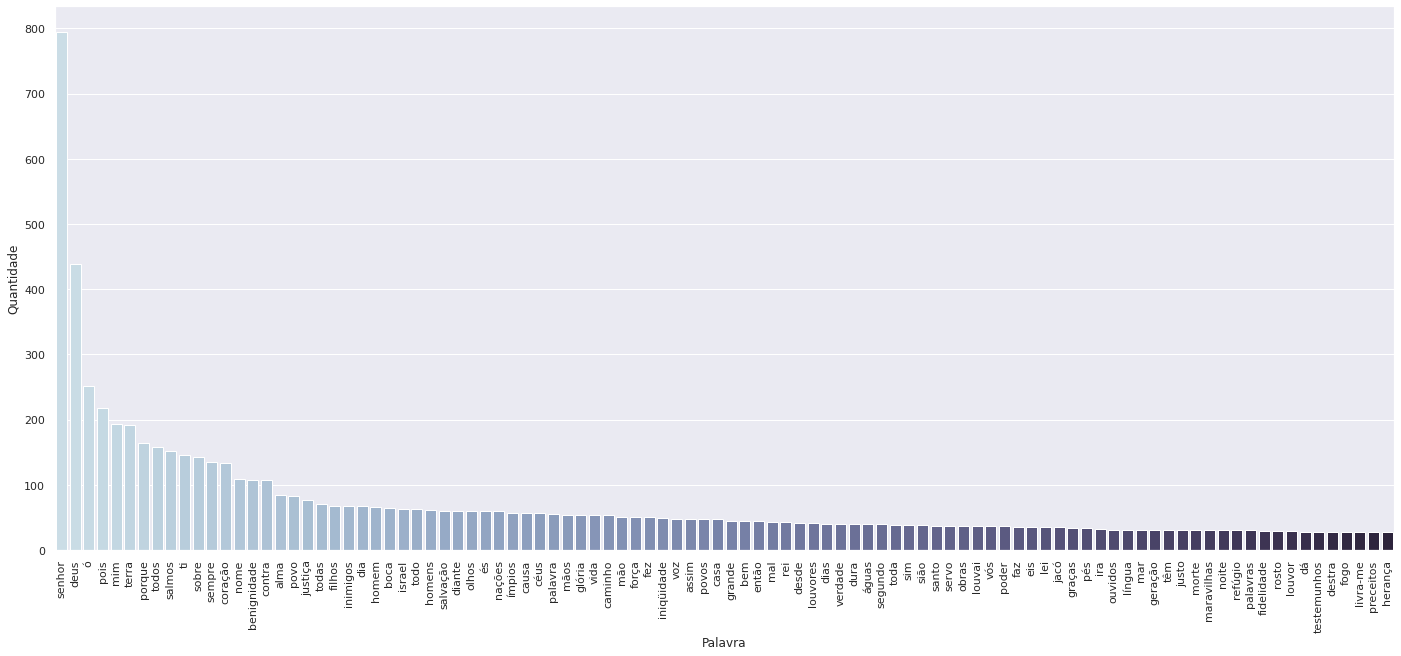

In [29]:
sns.set_theme(style='darkgrid') # Definindo a cor de fundo
plt.figure(figsize=(24,10)) # Definindo o tamanho do Dataframe
sns.barplot(x='Palavra', y='Quantidade', data=df, palette='ch:s=.25,rot=-.25') # Definindo os dados dos eixos x e y e a cor das barras
plt.xticks(rotation=90) # Alterando a posição dos nomes no gráfico
plt.show() # Plotando o gráfico

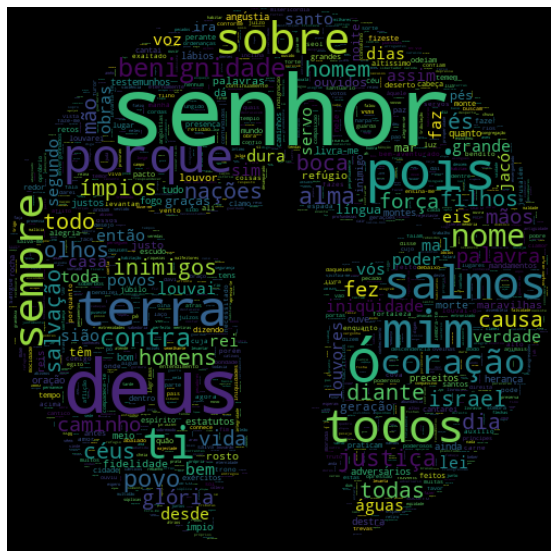

In [41]:
cristo = np.array(Image.open("/content/Cristo-Redentor.jpg")) # Extraindo a imagem

# Gerando uma wordcloud
wordcloud = WordCloud(background_color='Black', 
                      width=1000, height=1000, 
                      max_words=2000, mask=cristo, 
                      max_font_size=200,min_font_size=1
                      ).generate_from_frequencies(contaPalavra)
plt.subplots(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# **Conclusão**

Conclui-se que os cinco termos com maior frequência no livro de Salmos foram: *'senhor'*, *'deus'*, *'ó'*, *'pois'* e *'mim'*, onde se confirma a teoria da Lei de Zipf, que diz que a palavra mais frequente ocorrerá aproximadamente duas vezes mais frequentemente do que a segunda palavra mais frequente, três vezes mais vezes que a terceira palavra mais frequente, e assim sucessivamente.